In [15]:
import numpy as np

def KNNClassifier(testData, trainingData, trainingLabel, k):
    # Calculate euclidean distance
    diffMat = np.tile(testData, (trainingData.shape[0], 1)) - trainingData
    sqDiffMat = diffMat ** 2
    sqDistance = sqDiffMat.sum(axis=1)
    distances = sqDistance ** 0.5
    sortedDistIndices = distances.argsort()
    
    # Select the nearest k and their labels
    classCount = {}
    for i in range(k):
        voteLabel = trainingLabel[sortedDistIndices[i]]
        if voteLabel not in classCount:
            classCount[voteLabel] = 1
        else:
            classCount[voteLabel] += 1
    
    # Return the most common label
    sortedclassCount = sorted(classCount.items(), key=lambda d: d[1], reverse=True)
    return sortedclassCount[0][0]

In [17]:
testData = [1.0,0.8]
trainingData = np.array([[1.0, 1.1],[1.0,1.0],[0.1,0.1],[0.1,0]])
trainingLabel = ['A','A','B','B']

print(KNNClassifier(testData,trainingData,trainingLabel,3))

A


In [19]:
import pandas as pd

data = pd.read_csv('KNNDateData.txt', sep="\t", header=None)
data.columns = ["flightMiles", "videoGamesPct", "iceCream", "like"]

data.head()

,flightMiles,videoGamesPct,iceCream,like
0,40920,8.326976,0.953952,3
1,14488,7.153469,1.673904,2
2,26052,1.441871,0.805124,1
3,75136,13.147394,0.428964,1
4,38344,1.669788,0.134296,1


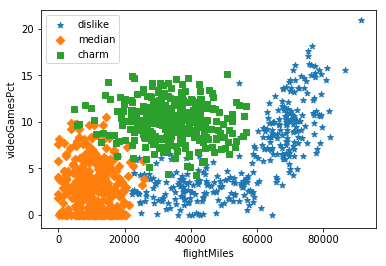

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

dislike = data[data.like==1]
median = data[data.like==2]
charm = data[data.like==3]
plt.scatter(dislike['flightMiles'], dislike['videoGamesPct'], marker = '*', label = 'dislike')
plt.scatter(median['flightMiles'], median['videoGamesPct'], marker = 'D', label = 'median')
plt.scatter(charm['flightMiles'], charm['videoGamesPct'], marker = 's', label = 'charm')
plt.xlabel('flightMiles')
plt.ylabel('videoGamesPct')
plt.legend()
plt.show()

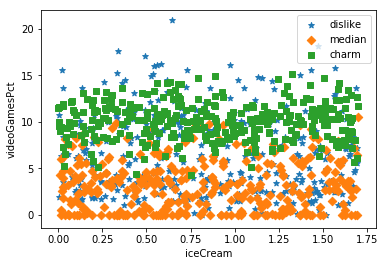

In [41]:
plt.scatter(dislike['iceCream'], dislike['videoGamesPct'], marker = '*', label = 'dislike')
plt.scatter(median['iceCream'], median['videoGamesPct'], marker = 'D', label = 'median')
plt.scatter(charm['iceCream'], charm['videoGamesPct'], marker = 's', label = 'charm')
plt.xlabel('iceCream')
plt.ylabel('videoGamesPct')
plt.legend()
plt.show()

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
flightMiles      1000 non-null int64
videoGamesPct    1000 non-null float64
iceCream         1000 non-null float64
like             1000 non-null int64
dtypes: float64(2), int64(2)
memory usage: 31.3 KB


In [44]:
data.describe()

,flightMiles,videoGamesPct,iceCream,like
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,33635.421000,6.559961,0.832073,1.985000
std,21957.006833,4.243618,0.497239,0.818196
min,0.000000,0.000000,0.001156,1.000000
25%,13796.000000,2.933963,0.408995,1.000000
50%,31669.000000,6.595204,0.809420,2.000000
75%,47716.250000,10.056500,1.272847,3.000000
max,91273.000000,20.919349,1.695517,3.000000


In [51]:
print(data.max() - data.min())

flightMiles      91273.000000
videoGamesPct       20.919349
iceCream             1.694361
like                 2.000000
dtype: float64


In [52]:
# Min-Max Normalization
def minMaxNorm(dataMat):
    maxVals = dataMat.max()
    minVals = dataMat.min()
    return (dataMat - minVals)/(maxVals - minVals)


In [56]:
normData = minMaxNorm(data)
normData.head()

,flightMiles,videoGamesPct,iceCream,like
0,0.448325,0.398051,0.562334,1.0
1,0.158733,0.341955,0.987244,0.5
2,0.285429,0.068925,0.474496,0.0
3,0.823201,0.628480,0.252489,0.0
4,0.420102,0.079820,0.078578,0.0


In [60]:
normData.values[1,-1]

0.5

In [66]:
# Testing

N = normData.shape[0]
testRatio = 0.4
n = int(testRatio * N) # 0 - n will be used for testing; n - N will be used for training
errorCount = 0
normDataMat = normData.values


for i in range(n):
    classiferResult = KNNClassifier(normDataMat[i,:-1],normDataMat[n:,:-1],normDataMat[n:,-1],3)
    groundTruth = normDataMat[i,-1]
    if (classiferResult != groundTruth):
        errorCount += 1
        
print("The total error rate is %f" %(errorCount/float(n)))

The total error rate is 0.075000


In [ ]:
# Prediction